# Task **1**

In [ ]:
!pip install user requests-html
!pip install requests-html
from bs4 import BeautifulSoup
import pandas as pd 
import requests 
import re
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement user (from versions: none)
ERROR: No matching distribution found for user


##Crawl 60 stock symbols

In [ ]:
#Lấy url để crawl tất cả các mã chứng khoán trong HOSE
url = f'https://www.cophieu68.vn/stockonline.php?stcid=1&o=stockname'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
r = requests.get(url, headers=headers,verify= False)
soup = BeautifulSoup(r.content,'html.parser')
symbol = []
divs = soup.find_all('td',attrs={'class':'td_stock'})
#print(divs)
for item in divs: 
  title = item.find_all('a',attrs={'class':'stockname'})
  for j in title:
    stock = j.text
    symbol.append(stock)

print(symbol)

['AAA', 'AAM', 'AAT', 'ABS', 'ABT', 'ACB', 'ACC', 'ACL', 'ADG', 'ADS', 'AGG', 'AGM', 'AGR', 'AMD', 'ANV', 'APC', 'APG', 'APH', 'ASG', 'ASM', 'ASP', 'AST', 'BAF', 'BBC', 'BCE', 'BCG', 'BCM', 'BFC', 'BHN', 'BIC', 'BID', 'BKG', 'BMC', 'BMI', 'BMP', 'BRC', 'BSI', 'BTP', 'BTT', 'BVH', 'BWE', 'C32', 'C47', 'CAV', 'CCI', 'CCL', 'CDC', 'CEE', 'CFPT2102', 'CFPT2103', 'CFPT2105', 'CFPT2106', 'CHP', 'CHPG2109', 'CHPG2111', 'CIG', 'CII', 'CKDH2104', 'CKDH2106', 'CKG', 'CLC', 'CLL', 'CLW', 'CMBB2103', 'CMBB2104', 'CMBB2105', 'CMG', 'CMSN2104', 'CMSN2105', 'CMV', 'CMWG2104', 'CMWG2106', 'CMWG2107', 'CMX', 'CNG', 'CNVL2103', 'COM', 'CPNJ2104', 'CPNJ2105', 'CRC', 'CRE', 'CSM', 'CSTB2105', 'CSTB2107', 'CSV', 'CTCB2105', 'CTCB2106', 'CTD', 'CTF', 'CTG', 'CTI', 'CTS', 'CVHM2107', 'CVHM2109', 'CVIC2104', 'CVIC2105', 'CVJC2101', 'CVNM2106', 'CVNM2107', 'CVNM2109', 'CVNM2110', 'CVPB2106', 'CVRE2105', 'CVRE2106', 'CVT', 'D2D', 'DAG', 'DAH', 'DAT', 'DBC', 'DBD', 'DBT', 'DC4', 'DCL', 'DCM', 'DGC', 'DGW', 'DHA'

In [ ]:
stockSymbol = []
for i in symbol[0:48]: 
    stockSymbol.append(i)
for j in symbol[420:432]:
    stockSymbol.append(j)
for n,i in enumerate(stockSymbol):
  if i == 'AAT':
    stockSymbol[n]='VCB'
  if i == 'BAF':
    stockSymbol[n]='NVL'
  if i == 'BKG':
    stockSymbol[n]='ROS'

# Lấy 60 mã chứng khoán 
print(len(stockSymbol))   
print(stockSymbol)

60
['AAA', 'AAM', 'VCB', 'ABS', 'ABT', 'ACB', 'ACC', 'ACL', 'ADG', 'ADS', 'AGG', 'AGM', 'AGR', 'AMD', 'ANV', 'APC', 'APG', 'APH', 'ASG', 'ASM', 'ASP', 'AST', 'NVL', 'BBC', 'BCE', 'BCG', 'BCM', 'BFC', 'BHN', 'BIC', 'BID', 'ROS', 'BMC', 'BMI', 'BMP', 'BRC', 'BSI', 'BTP', 'BTT', 'BVH', 'BWE', 'C32', 'C47', 'CAV', 'CCI', 'CCL', 'CDC', 'CEE', 'VNS', 'VOS', 'VPB', 'VPD', 'VPG', 'VPH', 'VPI', 'VPS', 'VRC', 'VRE', 'VSC', 'VSH']


In [ ]:
#Để lấy được closing prices cần chuyển các mã ck thành lowercase
converted_list = [x.lower() for x in stockSymbol]
print(converted_list)

['aaa', 'aam', 'vcb', 'abs', 'abt', 'acb', 'acc', 'acl', 'adg', 'ads', 'agg', 'agm', 'agr', 'amd', 'anv', 'apc', 'apg', 'aph', 'asg', 'asm', 'asp', 'ast', 'nvl', 'bbc', 'bce', 'bcg', 'bcm', 'bfc', 'bhn', 'bic', 'bid', 'ros', 'bmc', 'bmi', 'bmp', 'brc', 'bsi', 'btp', 'btt', 'bvh', 'bwe', 'c32', 'c47', 'cav', 'cci', 'ccl', 'cdc', 'cee', 'vns', 'vos', 'vpb', 'vpd', 'vpg', 'vph', 'vpi', 'vps', 'vrc', 'vre', 'vsc', 'vsh']


##Lấy giá đóng cửa

In [ ]:
#Tạo list links để chứa các link của 60 mã chứng khoán
links=[]
j = -1
while(j<59): 
  j+=1
  for i in range(1,4):
    
    params = {
        'currentPage': i,
        'id': converted_list[j]
        
    }
    payload = {}
    web  = requests.get('https://www.cophieu68.vn/historyprice.php?',params=params,data = payload,verify=False)
    link = web.url
    links.append(link)

In [ ]:
#Tạo stock_list là 1 list chứa các giá chứng khoán trong bảng
stock_list = []
for link in links:
  r = requests.get(link,headers=headers, verify = False)
  soup = BeautifulSoup(r.content,'lxml')
  finding = soup.find_all('td',attrs={'class':'td_bottom3 td_bg2'})
  for item in finding:
    c = item.find_all('span')
    # print(c)
    for j in c:
      stock_price = j.text.strip()
      # stock_price= {
      #     'price':close_price
      # }  close_price = j.text.strip()
      stock_list.append(stock_price)
#print(len(stock_list))

In [ ]:
print(stock_list)

['-0.05', '-0.23%', '21.35', '21.50', '22.20', '20.95', '1.40', '7%', '21.40', '20', '21.40', '19.50', '0.65', '3.36%', '20', '20', '20.60', '19.70', '1.25', '6.91%', '19.35', '18', '19.35', '17.60', '-0.50', '-2.69%', '18.10', '18.50', '18.70', '17.90', '-0.10', '-0.53%', '18.60', '18.75', '19.20', '18.50', '0.20', '1.08%', '18.70', '18.40', '19.20', '18.10', '0.15', '0.82%', '18.50', '18.40', '19.30', '18.40', '0.70', '3.97%', '18.35', '17.75', '18.50', '17.40', '0.65', '3.82%', '17.65', '17.30', '17.80', '17.10', '0.20', '1.19%', '17', '16.80', '17.15', '16.75', '0.20', '1.20%', '16.80', '16.55', '17', '16.55', '0.05', '0.30%', '16.60', '16.75', '17', '16.55', '0.30', '1.85%', '16.55', '16.40', '16.70', '16.30', '-0.65', '-3.85%', '16.25', '16.90', '17.05', '15.95', '-0.65', '-3.70%', '16.90', '17.55', '17.65', '16.90', '0.15', '0.86%', '17.55', '17.40', '17.95', '17.40', '0.55', '3.26%', '17.40', '16.85', '17.50', '16.85', '0.05', '0.30%', '16.85', '17.10', '17.45', '16.75', '-0.10

In [ ]:
# Lấy giá đóng cửa của mã chứng khoán
# Giá đóng cửa nằm ở vị trí thứ 2 trong stock_list nên sẽ tạo vòng lặp cho b=6, b+=6 đi qua c = b - 10 = 2
b = 6
closing_price_all = [] # tạo list để chứa các giá đóng cửa
while(b < len(stock_list)):
    b += 6
    c = b-10 
    closing_price_all.append(stock_list[c])

count = 0
for i in closing_price_all:
  closing_price_all[count] = float(i)
  count += 1

print(len(closing_price_all))
print(closing_price_all)

17999
[21.35, 21.4, 20.0, 19.35, 18.1, 18.6, 18.7, 18.5, 18.35, 17.65, 17.0, 16.8, 16.6, 16.55, 16.25, 16.9, 17.55, 17.4, 16.85, 16.8, 16.9, 17.1, 17.0, 17.1, 16.6, 17.5, 18.6, 17.9, 17.8, 18.4, 18.3, 18.0, 18.15, 17.1, 17.25, 17.0, 16.6, 16.7, 17.5, 17.55, 17.2, 16.9, 17.1, 16.2, 16.15, 16.15, 15.9, 16.0, 16.1, 16.15, 16.35, 16.55, 16.25, 16.25, 16.2, 16.2, 16.55, 16.1, 16.0, 15.7, 15.55, 15.7, 15.7, 15.75, 15.55, 16.3, 16.6, 16.5, 16.05, 16.2, 16.55, 16.0, 16.1, 15.8, 16.05, 16.3, 16.15, 15.9, 16.0, 16.65, 16.2, 15.68, 15.64, 15.77, 15.15, 15.11, 14.84, 14.84, 15.37, 16.12, 15.59, 15.64, 15.9, 15.33, 15.24, 15.02, 15.28, 15.24, 15.06, 14.53, 14.31, 14.36, 14.36, 14.27, 14.27, 14.4, 14.14, 13.65, 13.74, 14.09, 13.65, 13.65, 13.08, 13.91, 14.09, 13.74, 14.05, 13.61, 14.22, 14.75, 15.28, 15.28, 16.39, 16.48, 17.18, 17.23, 18.11, 17.45, 16.34, 16.83, 16.79, 17.23, 17.58, 17.18, 16.92, 15.81, 15.24, 14.27, 14.22, 13.87, 13.69, 13.65, 14.14, 14.4, 14.36, 13.43, 13.38, 13.47, 13.56, 13.38, 

In [ ]:
#tạo list để chứa các ngày crawl được
date = []
for i in range(0,3):
  r = requests.get(links[i],headers=headers, verify = False)
  soup = BeautifulSoup(r.content,'lxml')
  finding = soup.find_all('td',attrs={'class':'td_bottom3 td_bg1','nowrap':'nowrap'})
  for item in finding:
    day = item.text.strip()
    date.append(day)

date_2021 = [s for s in date if "2021" in s] # lọc list date bằng date_2021 để lấy được các ngày trong năm 2021
print(date_2021)
print(len(date_2021))

['24-12-2021', '23-12-2021', '22-12-2021', '21-12-2021', '20-12-2021', '17-12-2021', '16-12-2021', '15-12-2021', '14-12-2021', '13-12-2021', '10-12-2021', '09-12-2021', '08-12-2021', '07-12-2021', '06-12-2021', '03-12-2021', '02-12-2021', '01-12-2021', '30-11-2021', '29-11-2021', '26-11-2021', '25-11-2021', '24-11-2021', '23-11-2021', '22-11-2021', '19-11-2021', '18-11-2021', '17-11-2021', '16-11-2021', '15-11-2021', '12-11-2021', '11-11-2021', '10-11-2021', '09-11-2021', '08-11-2021', '05-11-2021', '04-11-2021', '03-11-2021', '02-11-2021', '01-11-2021', '29-10-2021', '28-10-2021', '27-10-2021', '26-10-2021', '25-10-2021', '22-10-2021', '21-10-2021', '20-10-2021', '19-10-2021', '18-10-2021', '15-10-2021', '14-10-2021', '13-10-2021', '12-10-2021', '11-10-2021', '08-10-2021', '07-10-2021', '06-10-2021', '05-10-2021', '04-10-2021', '01-10-2021', '30-09-2021', '29-09-2021', '28-09-2021', '27-09-2021', '24-09-2021', '23-09-2021', '22-09-2021', '21-09-2021', '20-09-2021', '17-09-2021', '16-0

In [ ]:
# Theo như tìm hiểu, trong một năm một công ty có xấp xỉ 250 giá đóng cửa
# Tạo vòng lặp để thu về các giá đóng cửa trong năm 2021 của 1 công ty
a = -300
b =  -50
list_price = []
while (a < len(closing_price_all) and b < len(closing_price_all)):
      a+= 300 
      b+= 300
      list_price.append(closing_price_all[a:b])
      #print(a,b)

for stock_name, closing_price in zip(stockSymbol, list_price):
      print(stock_name,closing_price)    

AAA [21.35, 21.4, 20.0, 19.35, 18.1, 18.6, 18.7, 18.5, 18.35, 17.65, 17.0, 16.8, 16.6, 16.55, 16.25, 16.9, 17.55, 17.4, 16.85, 16.8, 16.9, 17.1, 17.0, 17.1, 16.6, 17.5, 18.6, 17.9, 17.8, 18.4, 18.3, 18.0, 18.15, 17.1, 17.25, 17.0, 16.6, 16.7, 17.5, 17.55, 17.2, 16.9, 17.1, 16.2, 16.15, 16.15, 15.9, 16.0, 16.1, 16.15, 16.35, 16.55, 16.25, 16.25, 16.2, 16.2, 16.55, 16.1, 16.0, 15.7, 15.55, 15.7, 15.7, 15.75, 15.55, 16.3, 16.6, 16.5, 16.05, 16.2, 16.55, 16.0, 16.1, 15.8, 16.05, 16.3, 16.15, 15.9, 16.0, 16.65, 16.2, 15.68, 15.64, 15.77, 15.15, 15.11, 14.84, 14.84, 15.37, 16.12, 15.59, 15.64, 15.9, 15.33, 15.24, 15.02, 15.28, 15.24, 15.06, 14.53, 14.31, 14.36, 14.36, 14.27, 14.27, 14.4, 14.14, 13.65, 13.74, 14.09, 13.65, 13.65, 13.08, 13.91, 14.09, 13.74, 14.05, 13.61, 14.22, 14.75, 15.28, 15.28, 16.39, 16.48, 17.18, 17.23, 18.11, 17.45, 16.34, 16.83, 16.79, 17.23, 17.58, 17.18, 16.92, 15.81, 15.24, 14.27, 14.22, 13.87, 13.69, 13.65, 14.14, 14.4, 14.36, 13.43, 13.38, 13.47, 13.56, 13.38, 13

## Chuyển dữ liệu vào file CSV


In [ ]:
list_price = np.array(list_price)

In [ ]:
# #Đưa dữ liệu vào file csv 
from google.colab import drive
from nltk.metrics import edit_distance
import csv

stt = [i for i in range(0,250)]
df = pd.DataFrame(list(zip(stockSymbol[0:60], list_price[0:60])), columns=['Symbol', f'{date_2021}'])
drive.mount('drive',force_remount=True) 
df.to_csv('Stock.csv',index=False,sep=',')
print(df.head(20))
!cp Stock.csv "drive/My Drive/"

Mounted at drive
   Symbol ['24-12-2021', '23-12-2021', '22-12-2021', '21-12-2021', '20-12-2021', '17-12-2021', '16-12-2021', '15-12-2021', '14-12-2021', '13-12-2021', '10-12-2021', '09-12-2021', '08-12-2021', '07-12-2021', '06-12-2021', '03-12-2021', '02-12-2021', '01-12-2021', '30-11-2021', '29-11-2021', '26-11-2021', '25-11-2021', '24-11-2021', '23-11-2021', '22-11-2021', '19-11-2021', '18-11-2021', '17-11-2021', '16-11-2021', '15-11-2021', '12-11-2021', '11-11-2021', '10-11-2021', '09-11-2021', '08-11-2021', '05-11-2021', '04-11-2021', '03-11-2021', '02-11-2021', '01-11-2021', '29-10-2021', '28-10-2021', '27-10-2021', '26-10-2021', '25-10-2021', '22-10-2021', '21-10-2021', '20-10-2021', '19-10-2021', '18-10-2021', '15-10-2021', '14-10-2021', '13-10-2021', '12-10-2021', '11-10-2021', '08-10-2021', '07-10-2021', '06-10-2021', '05-10-2021', '04-10-2021', '01-10-2021', '30-09-2021', '29-09-2021', '28-09-2021', '27-09-2021', '24-09-2021', '23-09-2021', '22-09-2021', '21-09-2021', '20-09

# **Task 2**

In [ ]:
!pip install tslearn

In [ ]:
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from sklearn.model_selection import train_test_split
from tslearn.clustering import KShape
from sklearn.metrics import adjusted_rand_score

In [ ]:
import matplotlib.pyplot as plt
import datetime
import time

In [ ]:
for i in range(len(closing_price_all)):
  closing_price_all[i] = float(closing_price_all[i])

print(closing_price_all)

[21.35, 21.4, 20.0, 19.35, 18.1, 18.6, 18.7, 18.5, 18.35, 17.65, 17.0, 16.8, 16.6, 16.55, 16.25, 16.9, 17.55, 17.4, 16.85, 16.8, 16.9, 17.1, 17.0, 17.1, 16.6, 17.5, 18.6, 17.9, 17.8, 18.4, 18.3, 18.0, 18.15, 17.1, 17.25, 17.0, 16.6, 16.7, 17.5, 17.55, 17.2, 16.9, 17.1, 16.2, 16.15, 16.15, 15.9, 16.0, 16.1, 16.15, 16.35, 16.55, 16.25, 16.25, 16.2, 16.2, 16.55, 16.1, 16.0, 15.7, 15.55, 15.7, 15.7, 15.75, 15.55, 16.3, 16.6, 16.5, 16.05, 16.2, 16.55, 16.0, 16.1, 15.8, 16.05, 16.3, 16.15, 15.9, 16.0, 16.65, 16.2, 15.68, 15.64, 15.77, 15.15, 15.11, 14.84, 14.84, 15.37, 16.12, 15.59, 15.64, 15.9, 15.33, 15.24, 15.02, 15.28, 15.24, 15.06, 14.53, 14.31, 14.36, 14.36, 14.27, 14.27, 14.4, 14.14, 13.65, 13.74, 14.09, 13.65, 13.65, 13.08, 13.91, 14.09, 13.74, 14.05, 13.61, 14.22, 14.75, 15.28, 15.28, 16.39, 16.48, 17.18, 17.23, 18.11, 17.45, 16.34, 16.83, 16.79, 17.23, 17.58, 17.18, 16.92, 15.81, 15.24, 14.27, 14.22, 13.87, 13.69, 13.65, 14.14, 14.4, 14.36, 13.43, 13.38, 13.47, 13.56, 13.38, 13.69,

In [ ]:
#tạo 1 hàm date có len mặc định là 242
## do kết quả sẽ liên tục tăng, nên ta sẽ lấy giá trị cố định nhằm giúp dễ vẽ biểu đồ
date_limit = []
count = 0
for i in range(len(date_2021)):
  
  if(count < 242): # độ dài 242 tức là lấy đầu năm tới ngày 21/12/2021
    date = date_2021[i]
    date_limit.append(date)
    count +=1
print(date_limit)
print(len(date_limit))

['24-12-2021', '23-12-2021', '22-12-2021', '21-12-2021', '20-12-2021', '17-12-2021', '16-12-2021', '15-12-2021', '14-12-2021', '13-12-2021', '10-12-2021', '09-12-2021', '08-12-2021', '07-12-2021', '06-12-2021', '03-12-2021', '02-12-2021', '01-12-2021', '30-11-2021', '29-11-2021', '26-11-2021', '25-11-2021', '24-11-2021', '23-11-2021', '22-11-2021', '19-11-2021', '18-11-2021', '17-11-2021', '16-11-2021', '15-11-2021', '12-11-2021', '11-11-2021', '10-11-2021', '09-11-2021', '08-11-2021', '05-11-2021', '04-11-2021', '03-11-2021', '02-11-2021', '01-11-2021', '29-10-2021', '28-10-2021', '27-10-2021', '26-10-2021', '25-10-2021', '22-10-2021', '21-10-2021', '20-10-2021', '19-10-2021', '18-10-2021', '15-10-2021', '14-10-2021', '13-10-2021', '12-10-2021', '11-10-2021', '08-10-2021', '07-10-2021', '06-10-2021', '05-10-2021', '04-10-2021', '01-10-2021', '30-09-2021', '29-09-2021', '28-09-2021', '27-09-2021', '24-09-2021', '23-09-2021', '22-09-2021', '21-09-2021', '20-09-2021', '17-09-2021', '16-0

In [ ]:
#chuyển đổi dạng dữ liệu time series nhằm giúp phù hợp với định dạng mô hình tslearn
dailyData = to_time_series_dataset(closing_price_all)
dailyData.shape

(1, 17999, 1)

In [ ]:
DataM = dailyData

In [ ]:
#láy 5 giá trị dữ liệu của 5 mã đầu tiên 
dailyBefore = dailyData 
dailyBefore = dailyBefore.reshape(-1,)
print(dailyBefore)
dataDaily1 = dailyBefore[:250]
print(dataDaily1)
dataDaily2 = dailyBefore[250:500]
print(dataDaily2)
dataDaily3 = dailyBefore[500:750]
print(dataDaily3)
dataDaily4 = dailyBefore[750:1000]
print(dataDaily4)
dataDaily5 = dailyBefore[1000:1250]
print(dataDaily5)

[21.35 21.4  20.   ... 18.72 19.56 19.66]
[21.35 21.4  20.   19.35 18.1  18.6  18.7  18.5  18.35 17.65 17.   16.8
 16.6  16.55 16.25 16.9  17.55 17.4  16.85 16.8  16.9  17.1  17.   17.1
 16.6  17.5  18.6  17.9  17.8  18.4  18.3  18.   18.15 17.1  17.25 17.
 16.6  16.7  17.5  17.55 17.2  16.9  17.1  16.2  16.15 16.15 15.9  16.
 16.1  16.15 16.35 16.55 16.25 16.25 16.2  16.2  16.55 16.1  16.   15.7
 15.55 15.7  15.7  15.75 15.55 16.3  16.6  16.5  16.05 16.2  16.55 16.
 16.1  15.8  16.05 16.3  16.15 15.9  16.   16.65 16.2  15.68 15.64 15.77
 15.15 15.11 14.84 14.84 15.37 16.12 15.59 15.64 15.9  15.33 15.24 15.02
 15.28 15.24 15.06 14.53 14.31 14.36 14.36 14.27 14.27 14.4  14.14 13.65
 13.74 14.09 13.65 13.65 13.08 13.91 14.09 13.74 14.05 13.61 14.22 14.75
 15.28 15.28 16.39 16.48 17.18 17.23 18.11 17.45 16.34 16.83 16.79 17.23
 17.58 17.18 16.92 15.81 15.24 14.27 14.22 13.87 13.69 13.65 14.14 14.4
 14.36 13.43 13.38 13.47 13.56 13.38 13.69 13.91 13.78 13.52 13.12 13.34
 13.38 13.52 13.74 

In [ ]:
dailyData = TimeSeriesScalerMeanVariance().fit_transform(dailyData)
dailyData.shape

(1, 17999, 1)

In [ ]:
dailyData = dailyData.reshape(1,17999)
dailyData

array([[-0.31852629, -0.31585464, -0.39066073, ..., -0.45905487,
        -0.41417122, -0.40882792]])

In [ ]:
#thực hiện chuyển đổi dạng dữ liệu giúp dễ dàng sử dụng cho sau này
dailyData = np.array(dailyData)
dailyData = dailyData.reshape(-1,) #dạng 1-D
print(dailyData)
#tạo dataframe
data_nor = pd.DataFrame(dailyData)
print(data_nor)
print(len(data_nor))


[-0.31852629 -0.31585464 -0.39066073 ... -0.45905487 -0.41417122
 -0.40882792]
              0
0     -0.318526
1     -0.315855
2     -0.390661
3     -0.425392
4     -0.492183
...         ...
17994 -0.454246
17995 -0.509282
17996 -0.459055
17997 -0.414171
17998 -0.408828

[17999 rows x 1 columns]
17999


In [ ]:
#lấy dữ liệu đã được normalize từ 5 stock đầu tiên
data1 = data_nor[:250]
print(data1)
data2 = data_nor[250:500]
print(data2)
data3 = data_nor[500:750]
print(data3)
data4 = data_nor[750:1000]
print(data4)
data5 = data_nor[1000:1250]
print(data5)

            0
0   -0.318526
1   -0.315855
2   -0.390661
3   -0.425392
4   -0.492183
..        ...
245 -0.779652
246 -0.776981
247 -0.798354
248 -0.793545
249 -0.798354

[250 rows x 1 columns]
            0
250 -0.821864
251 -0.793545
252 -0.776981
253 -0.786599
254 -0.829345
..        ...
495 -0.871557
496 -0.855527
497 -0.855527
498 -0.860870
499 -0.866214

[250 rows x 1 columns]
            0
500 -0.882244
501 -0.871557
502 -0.871557
503 -0.871557
504 -0.855527
..        ...
745  2.925386
746  2.830276
747  2.619216
748  2.660893
749  2.623490

[250 rows x 1 columns]
            0
750  2.694022
751  2.668908
752  2.569523
753  2.544944
754  2.635780
..        ...
995 -0.322267
996 -0.337762
997 -0.296084
998 -0.277917
999 -0.280589

[250 rows x 1 columns]
             0
1000 -0.267765
1001 -0.343105
1002 -0.416309
1003 -0.395470
1004 -0.418980
...        ...
1245  0.357400
1246  0.410833
1247  0.410833
1248  0.410833
1249  0.410833

[250 rows x 1 columns]


In [ ]:
symbol2 = []
for i in symbol[0:5]: 
    symbol2.append(i)

print(len(symbol2))   
print(symbol2)

5
['AAA', 'AAM', 'AAT', 'ABS', 'ABT']


In [ ]:
#Tạo train/test data
#data_train = data1
#data_train = train_test_split(data1,test_size = 0.3, random_state = 42)
X_train1 = data1
size1 = X_train1.shape[1]
X_train2 = data2
size2 = X_train2.shape[1]
X_train3 = data3
size3 = X_train3.shape[1]
X_train4 = data4
size4 = X_train4.shape[1]
X_train5 = data5
size5 = X_train5.shape[1]
print(X_train1.shape)
print(X_train2.shape)
print(X_train3.shape)

(250, 1)
(250, 1)
(250, 1)


245


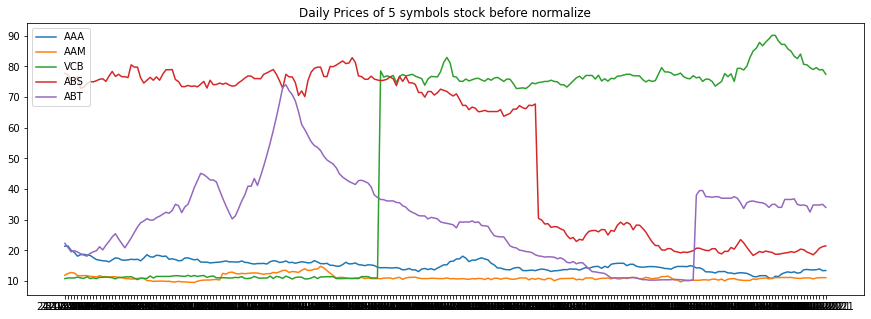

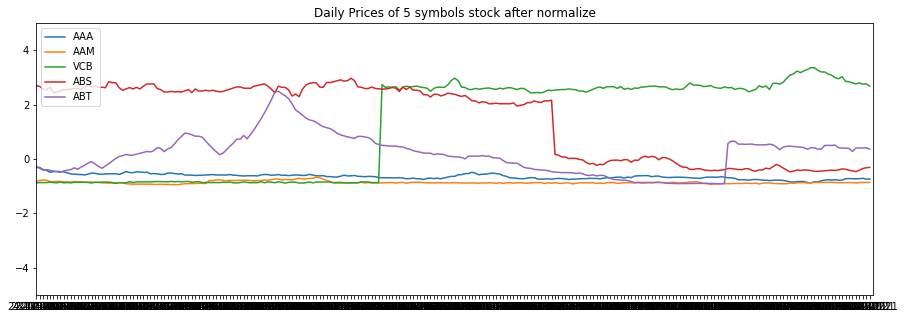

In [ ]:
#vẽ biểu đồ Daily Prices trước khi normalize bằng TimeSeriesScalerMeanVariance 
print(len(date_2021))
#plt.subplot(2,1,1)
plt.figure(figsize=(15,5))
x= np.arange(len(date_limit))
y= np.array(dataDaily1[:242])
y2 = np.array(dataDaily2[:242])
y3 = np.array(dataDaily3[:242])
y4 = np.array(dataDaily4[:242])
y5 = np.array(dataDaily5[:242])
plt.xticks(x,date_limit)
#plt.xlim(0,242)
plt.plot(x,y , label='AAA')
plt.plot(x,y2, label ='AAM')
plt.plot(x,y3, label ='VCB')
plt.plot(x,y4, label ='ABS')
plt.plot(x,y5, label ='ABT')
plt.legend(loc="upper left") # show chú thích góc trên bên trái

plt.title('Daily Prices of 5 symbols stock before normalize')
plt.show()

#biểu đồ sau khi normalize 
#plt.subplot(2,1,2)

plt.figure(figsize=(15,5))
X= np.arange(len(date_limit))

plt.xticks(X,date_2021)
Y1 = np.array(X_train1[:242])
Y2 = np.array(X_train2[:242])
Y3 = np.array(X_train3[:242])
Y4 = np.array(X_train4[:242])
Y5 = np.array(X_train5[:242])
plt.plot(X,Y1 , label='AAA')
plt.plot(X,Y2, label ='AAM')
plt.plot(X,Y3, label ='VCB')
plt.plot(X,Y4, label ='ABS')
plt.plot(X,Y5, label ='ABT')
plt.xlim(0,242)
plt.ylim(-5,5)
plt.legend(loc="upper left") # show chú thích góc trên bên trái
plt.title('Daily Prices of 5 symbols stock after normalize')

plt.show()

In [ ]:
# # #Phương pháp khác: MinMax scaler
from tslearn.preprocessing.preprocessing import TimeSeriesScalerMinMax
DataM = TimeSeriesScalerMinMax().fit_transform(DataM)
DataM

array([[[0.21956044],
        [0.22010989],
        [0.20472527],
        ...,
        [0.19065934],
        [0.19989011],
        [0.20098901]]])

In [ ]:
#chuyển đổi shape và tậo dataframe
DataM = np.array(DataM)
DataM = DataM.reshape(-1,)
print(DataM)
data_nor2 = pd.DataFrame(DataM)

[0.21956044 0.22010989 0.20472527 ... 0.19065934 0.19989011 0.20098901]


In [ ]:
Data1 = data_nor2[:250]
Data2 = data_nor2[250:500]
Data3 = data_nor2[500:750]
Data4 = data_nor2[750:1000]
Data5 = data_nor2[1000:1250]
X1_train = Data1
Size1 = X1_train.shape[1]
X2_train = Data2
Size2 = X2_train.shape[1]
X3_train = Data3
Size3 = X3_train.shape[1]
X4_train = Data4
Size4 = X4_train.shape[1]
X5_train = Data5
Size5 = X5_train.shape[1]

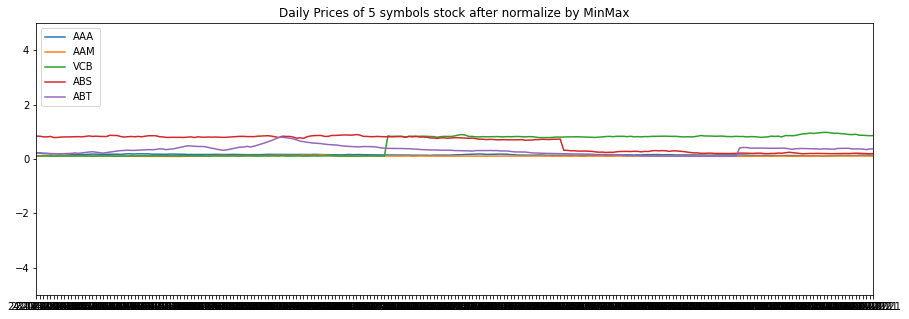

In [ ]:
# #biểu đồ sau khi normalize 
# #plt.subplot(2,1,2)

plt.figure(figsize=(15,5))
X= np.arange(len(date_limit))

plt.xticks(X,date_2021)
Y1 = np.array(X1_train[:242])
Y2 = np.array(X2_train[:242])
Y3 = np.array(X3_train[:242])
Y4 = np.array(X4_train[:242])
Y5 = np.array(X5_train[:242])
plt.plot(X,Y1 , label='AAA')
plt.plot(X,Y2, label ='AAM')
plt.plot(X,Y3, label ='VCB')
plt.plot(X,Y4, label ='ABS')
plt.plot(X,Y5, label ='ABT')
plt.xlim(0,238)
plt.ylim(-5,5)
plt.legend(loc="upper left") # show chú thích góc trên bên trái
plt.title('Daily Prices of 5 symbols stock after normalize by MinMax')

plt.show()